# Phase 3 mini-project

## Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.  

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown)
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2: No consumption, -1=paid in full, 0=Use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

Some ideas for exploration:

1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?

## Data cleaning and EDA
**Output** - df

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, LassoLarsCV, LassoLarsIC, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, plot_confusion_matrix, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder, StandardScaler, scale
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold, f_regression, mutual_info_regression, SelectKBest, RFE, RFECV
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [5]:
# Import the data

df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [8]:
for col in df.columns:
    print(df[col].value_counts())

2047     1
1322     1
15629    1
9486     1
11535    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
780000.0        2
690000.0        1
1000000.0       1
760000.0        1
327680.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64
2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
5

In [9]:
df.duplicated().sum()

0

In [10]:
df['default.payment.next.month'].value_counts() # Definnite class imbalance, may need to address

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

## Examine negative values

In [11]:
df[(df['BILL_AMT1']<0) | (df['BILL_AMT2']<0) | (df['BILL_AMT3']<0) | 
   (df['BILL_AMT4']<0) | (df['BILL_AMT5']<0) | (df['BILL_AMT6']<0)]#['default.payment.next.month']
# df[(df.origin == "JFK") & (df.carrier == "B6")]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
7          8   100000.0    2          2         2   23      0     -1     -1   
26        27    60000.0    1          1         2   27      1     -2     -1   
35        36   160000.0    1          1         2   30     -1     -1     -2   
37        38    60000.0    2          2         2   22      0      0      0   
56        57   180000.0    2          3         1   34      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29931  29932    60000.0    1          2         3   41      0      0      0   
29958  29959   230000.0    1          3         2   31      0     -1     -1   
29962  29963    50000.0    1          2         2   30      1     -1      2   
29989  29990   150000.0    1          1         2   35     -1     -1     -1   
29998  29999    80000.0    1          3         1   41      1     -1      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
7          0  ...      221.0     -159.0      567.0     380.0     601.0   
26        -1  ...      -57.0      127.0     -189.0       0.0    1000.0   
35        -2  ...     -923.0    -1488.0    -1884.0     131.0     396.0   
37         0  ...     6026.0   -28335.0    18660.0    1500.0    1518.0   
56        -1  ...     7142.0     -679.0     8321.0    8500.0    1500.0   
...      ...  ...        ...        ...        ...       ...       ...   
29931      0  ...    26940.0     9971.0   -11798.0    2200.0    2000.0   
29958     -1  ...      417.0      613.0     -191.0    1000.0    1000.0   
29962     -1  ...     7300.0        0.0        0.0     528.0       0.0   
29989     -1  ...      780.0        0.0        0.0    9054.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
7           0.0     581.0    1687.0    1542.0                           0  
26          0.0     500.0       0.0    1000.0                           1  
35        396.0     565.0     792.0       0.0                           0  
37       2043.0       0.0   47671.0     617.0                           0  
56       7500.0     679.0    9000.0    2000.0                           0  
...         ...       ...       ...       ...                         ...  
29931    1200.0       0.0       0.0   28000.0                           0  
29958    1000.0    1000.0       0.0       0.0                           0  
29962    7300.0       0.0       0.0       0.0                           0  
29989     783.0       0.0       0.0       0.0                           0  
29998    1178.0    1926.0   52964.0    1804.0                           1  

[1930 rows x 25 columns]

## Make categorical variables and get dummies
**Output** - categoricals, one_hot_df, X, y

In [12]:
categoricals = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in categoricals:
    df[col]=df[col].astype('category')

In [13]:
one_hot_df = pd.get_dummies(df)
one_hot_df.head()

ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   1    20000.0   24     3913.0     3102.0      689.0        0.0        0.0   
1   2   120000.0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2   3    90000.0   34    29239.0    14027.0    13559.0    14331.0    14948.0   
3   4    50000.0   37    46990.0    48233.0    49291.0    28314.0    28959.0   
4   5    50000.0   57     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  \
0        0.0       0.0  ...         1         0        0        0        0   
1     3261.0       0.0  ...         0         0        0        1        0   
2    15549.0    1518.0  ...         0         0        1        0        0   
3    29547.0    2000.0  ...         0         0        1        0        0   
4    19131.0    2000.0  ...         0         0        1        0        0   

   PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 93 columns]

In [14]:
# ID column is irrelevent
X = one_hot_df.drop(columns=['default.payment.next.month','ID'])
y = one_hot_df['default.payment.next.month']

## Train, test, split
**Output** - X_train, X_test, y_train, y_test, train_df, test_df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

## Scale variables
**Output** - scaler, scaled_data_train, scaled_data_test, scaled_X_train, scaled_X_test

In [22]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_X_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_data_test, columns=X_train.columns)
scaled_X_test.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.288898 -0.920456   0.348532   0.421797   0.488121   0.601002   0.716778   
1  -0.134465  0.598337   0.178508   0.110441  -0.212289  -0.349144  -0.315319   
2  -0.288898 -0.811971   1.104133   1.194427   1.244432   1.385759   1.523924   
3  -0.752196  1.574704  -0.327473  -0.710788  -0.427164  -0.397427  -0.365294   
4  -1.138278  0.815307  -0.543539  -0.519139  -0.480649  -0.449824  -0.422292   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1   PAY_6_0   PAY_6_2  \
0   0.786611 -0.135025 -0.088254  ... -0.440398 -0.485581  0.915962 -0.320001   
1   1.765031 -0.248120 -0.210603  ... -0.440398 -0.485581  0.915962 -0.320001   
2   1.574587  0.084076  0.046146  ... -0.440398 -0.485581  0.915962 -0.320001   
3  -0.342327 -0.293487  0.577566  ... -0.440398 -0.485581  0.915962 -0.320001   
4  -0.401448 -0.282918 -0.198687  ... -0.440398 -0.485581  0.915962 -0.320001   

   PAY_6_3   PAY_6_4   PAY_6_5   PAY_6_6   PAY_6_7   PAY_6_8  
0 -0.07827 -0.040032 -0.017641 -0.024952 -0.037144 -0.009429  
1 -0.07827 -0.040032 -0.017641 -0.024952 -0.037144 -0.009429  
2 -0.07827 -0.040032 -0.017641 -0.024952 -0.037144 -0.009429  
3 -0.07827 -0.040032 -0.017641 -0.024952 -0.037144 -0.009429  
4 -0.07827 -0.040032 -0.017641 -0.024952 -0.037144 -0.009429  

[5 rows x 91 columns]

In [19]:
''' You may have noticed that the scaler also scaled our binary/one-hot encoded columns, too! 
Although it doesn't look as pretty, this has no negative effect on the model. Each 1 and 0 have been
replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning
the overall information content of each column has not changed.'''
scaled_df_train.PAY_6_4.value_counts()

-0.040032     22464
 24.979992       36
Name: PAY_6_4, dtype: int64

## Run KNN model
**Output** - knn1 - knn3, knn1_test_preds, knn2_test_preds, knn3_test_preds, print_metrics(), find_best_k()

Ran on ohe and scaled data

### Run initial KNN (default of 5)
Precision Score: 0.5505097312326228  
Recall Score: 0.36087484811664644  
Accuracy Score: 0.7950666666666667  
F1 Score: 0.4359633027522936

In [20]:
# Instantiate KNeighborsClassifier
knn1 = KNeighborsClassifier()

# Fit the classifier
knn1.fit(scaled_X_train, y_train)

# Predict on the test set
knn1_test_preds = knn1.predict(scaled_X_test)

In [21]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, knn1_test_preds)

Precision Score: 0.5505097312326228
Recall Score: 0.36087484811664644
Accuracy Score: 0.7950666666666667
F1 Score: 0.4359633027522936


In [23]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [24]:
find_best_k(scaled_X_train, y_train, scaled_X_test, y_test)

Best Value for k: 25
F1-Score: 0.4656458578720063


### Run KNN with calculated best k of 25
Precision Score: 0.658157602663707  
Recall Score: 0.3602673147023086  
Accuracy Score: 0.8185333333333333  
F1 Score: 0.4656458578720063

In [25]:
# Instantiate KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Try changing weights='distance'

# Fit the classifier
knn2.fit(scaled_X_train, y_train)

# Predict on the test set
knn2_test_preds = knn2.predict(scaled_X_test)

In [26]:
print_metrics(y_test, knn2_test_preds)

Precision Score: 0.658157602663707
Recall Score: 0.3602673147023086
Accuracy Score: 0.8185333333333333
F1 Score: 0.4656458578720063


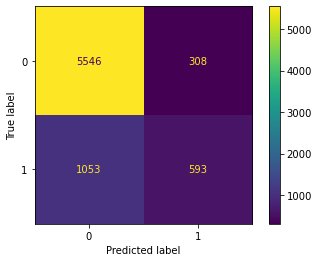

In [27]:
plot_confusion_matrix(knn2, scaled_X_test, y_test, values_format='.4g')
plt.show()

### Run KNN with calculated best k of 25, weights = 'distance'
Precision Score: 0.6459016393442623  
Recall Score: 0.35905224787363305  
Accuracy Score: 0.8161333333333334  
F1 Score: 0.46153846153846145

In [28]:
# Instantiate KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Try changing weights='distance'

# Fit the classifier
knn3.fit(scaled_X_train, y_train)

# Predict on the test set
knn3_test_preds = knn3.predict(scaled_X_test)

In [29]:
print_metrics(y_test, knn3_test_preds)

Precision Score: 0.6459016393442623
Recall Score: 0.35905224787363305
Accuracy Score: 0.8161333333333334
F1 Score: 0.46153846153846145


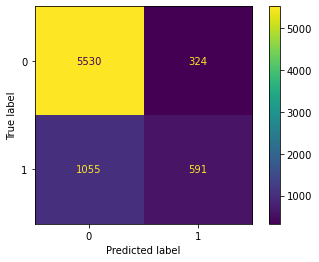

In [30]:
plot_confusion_matrix(knn3, scaled_X_test, y_test, values_format='.4g')
plt.show()

## Bayes Classification

## Decision Tree
**Output** - dt1 - dt7, y_preds_decision_tree

Ran on ohe data  * **but not scaled** * data

### Run initial Decision Tree
Precision Score: 0.39811542991755006  
Recall Score: 0.4106925880923451  
Accuracy Score: 0.7344  
F1 Score: 0.40430622009569384

In [61]:
# Create the classifier, fit it on the training data and make predictions on the test set

dt1 = DecisionTreeClassifier(criterion='entropy', random_state=10) # try with default GINI impurity
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

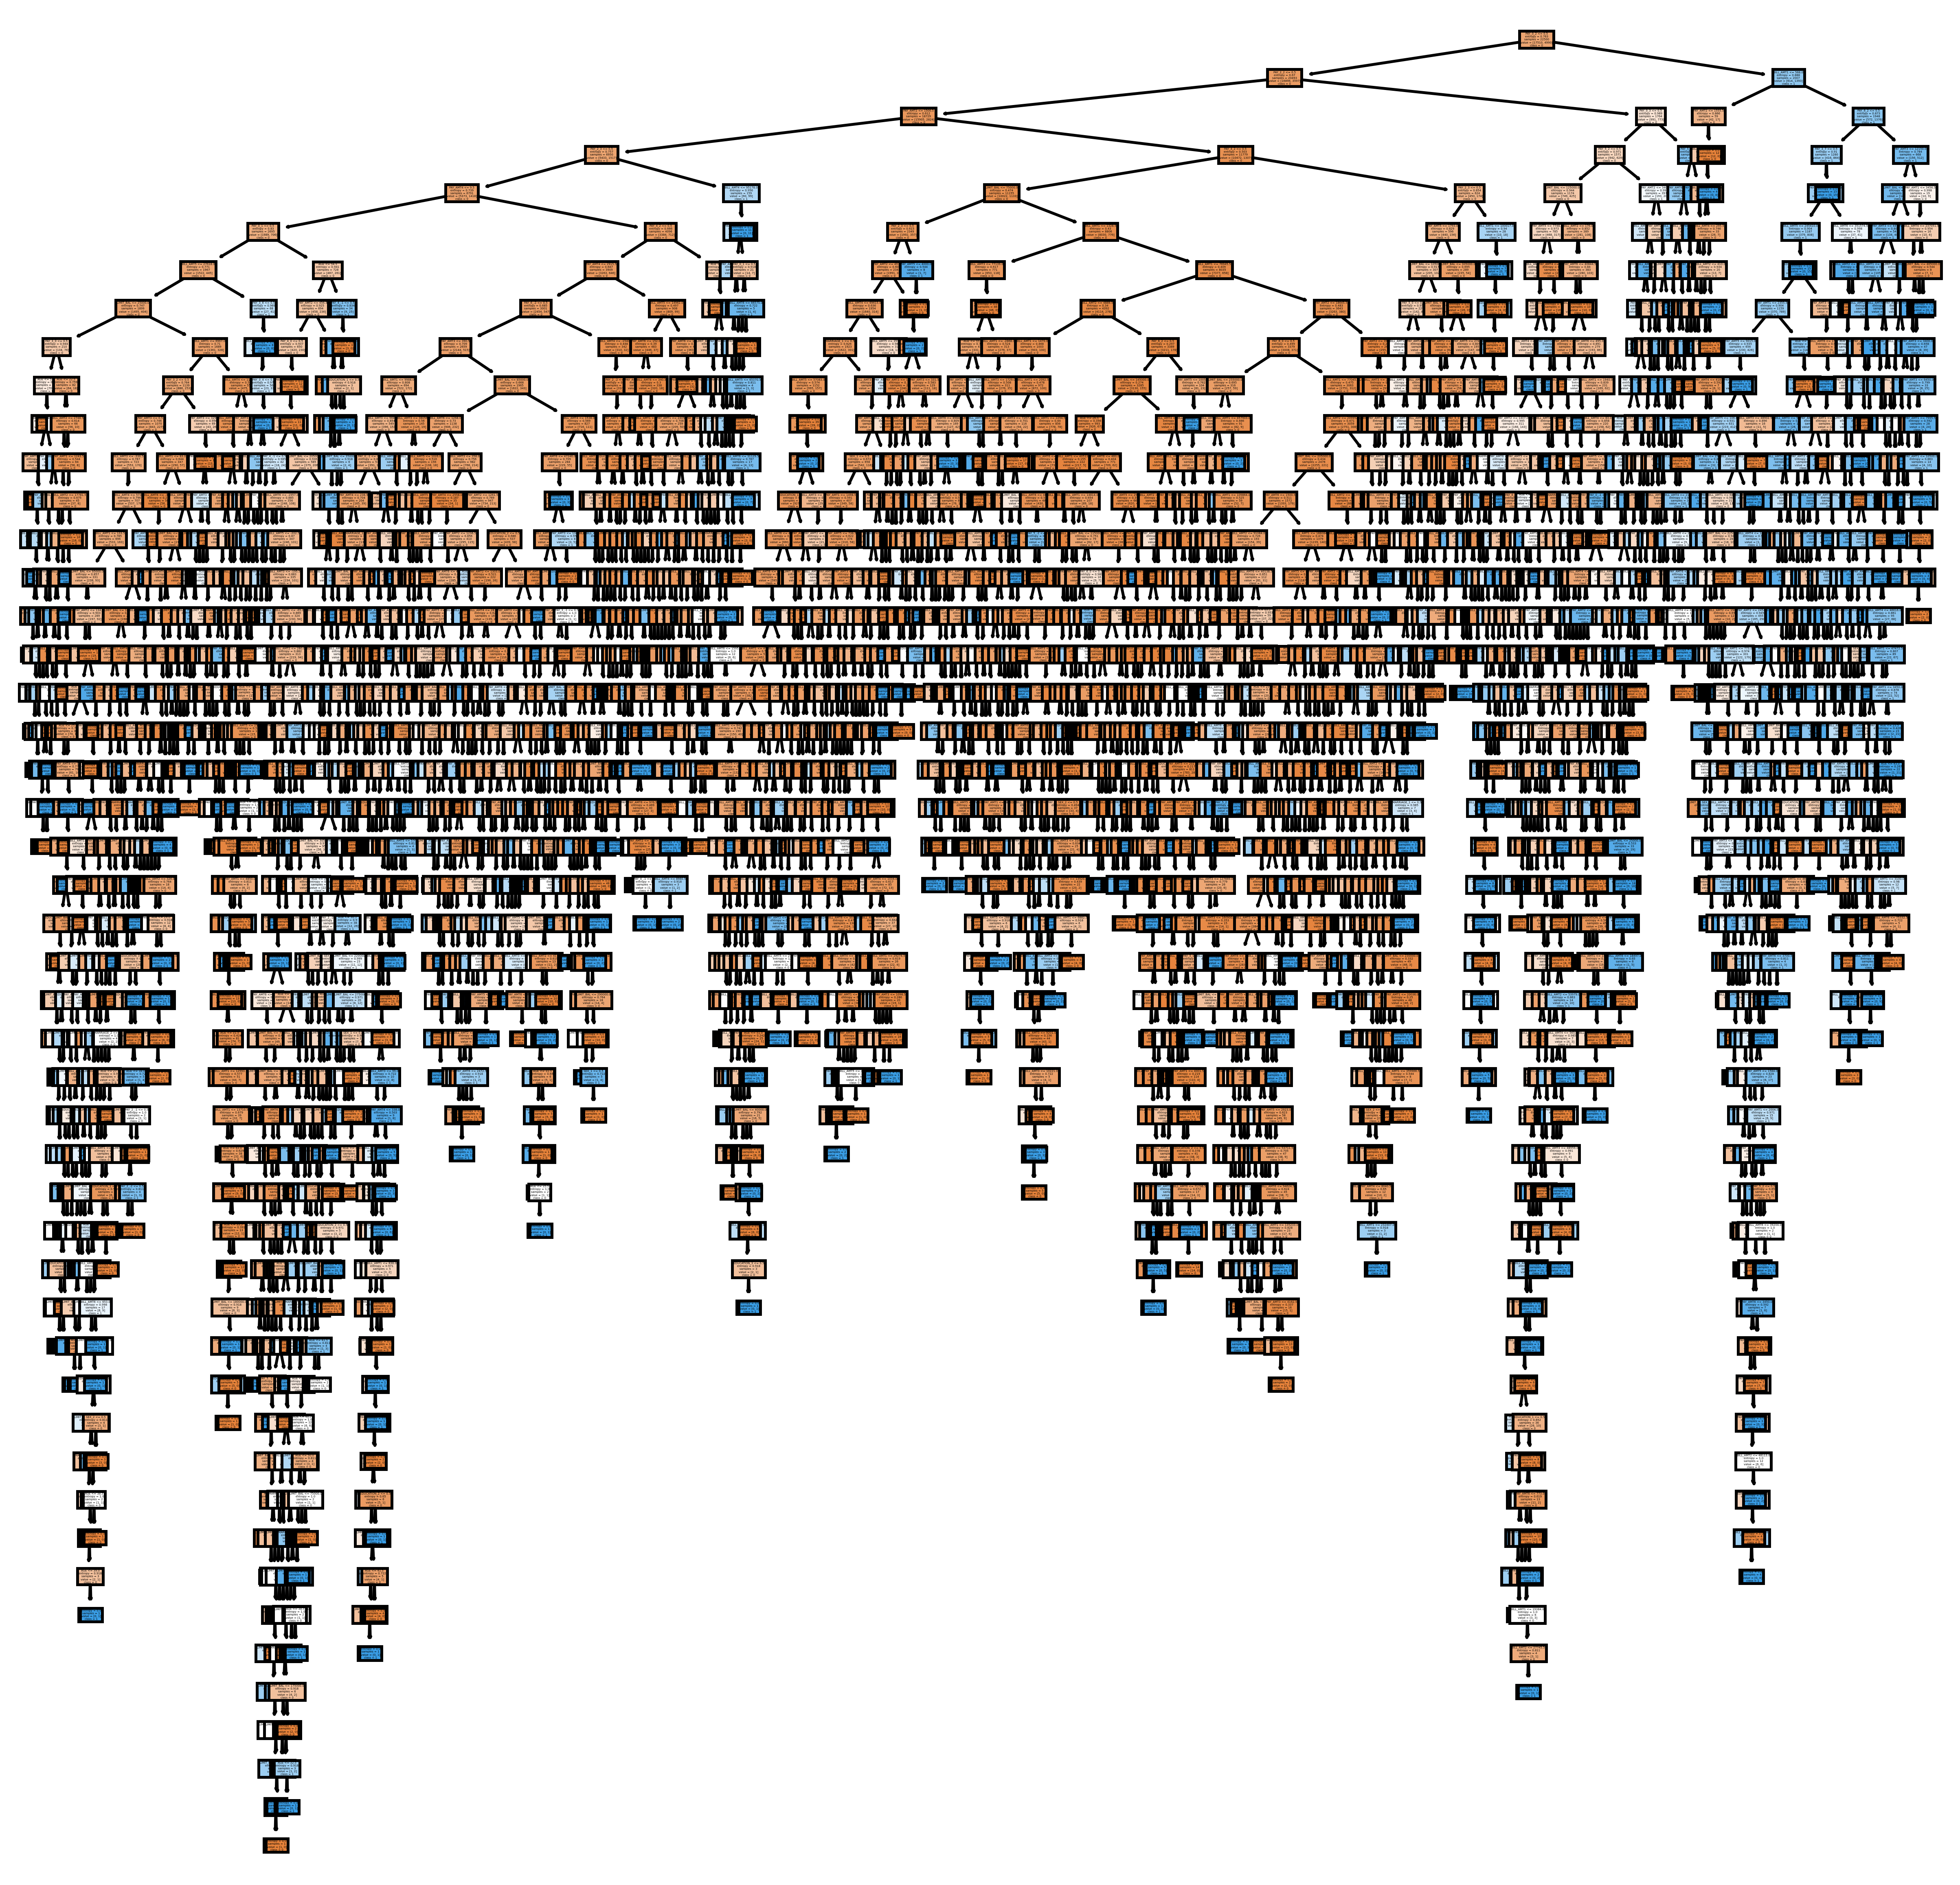

In [63]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=500)
tree.plot_tree(dt1,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [64]:
y_preds_decision_tree = dt1.predict(X_test)

print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.39811542991755006
Recall Score: 0.4106925880923451
Accuracy Score: 0.7344
F1 Score: 0.40430622009569384


In [65]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.62

Confusion Matrix
----------------


Predicted     0     1   All
True                       
0          4832  1022  5854
1           970   676  1646
All        5802  1698  7500

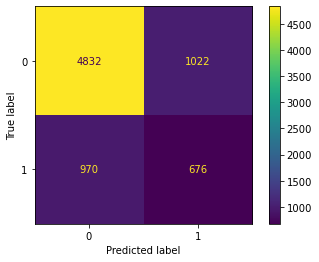

In [66]:
plot_confusion_matrix(dt1, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with Gini instead of Entropy
Precision Score: 0.3920044419766796  
Recall Score: 0.4289185905224787  
Accuracy Score: 0.7286666666666667  
F1 Score: 0.4096315636785611  

In [67]:
# Create the classifier, fit it on the training data and make predictions on the test set

dt2 = DecisionTreeClassifier(random_state=10) # with GINI default
dt2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [68]:
y_preds_decision_tree = dt2.predict(X_test)

print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.3920044419766796
Recall Score: 0.4289185905224787
Accuracy Score: 0.7286666666666667
F1 Score: 0.4096315636785611


In [69]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.62

Confusion Matrix
----------------


Predicted     0     1   All
True                       
0          4759  1095  5854
1           940   706  1646
All        5699  1801  7500

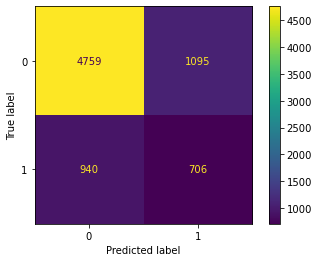

In [70]:
plot_confusion_matrix(dt2, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with Max Depth
Optimal Max_depth = 4  
Precision Score: 0.6615214994487321  
Recall Score: 0.3645200486026732  
Accuracy Score: 0.8196  
F1 Score: 0.4700352526439483  

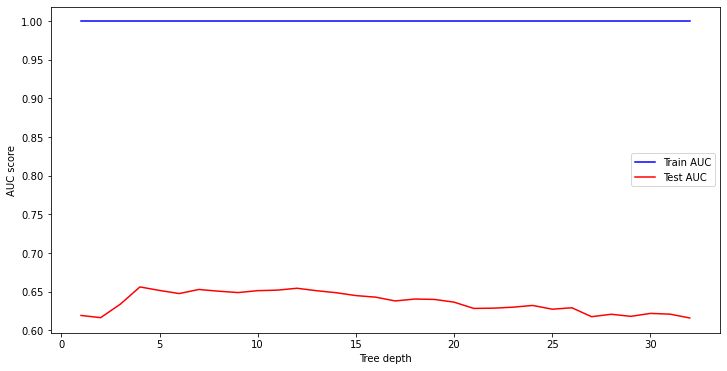

In [71]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
   dt3.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt3.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [72]:
# Training error decreases with increasing tree depth - clear sign of overfitting 
# Test error increases after depth=3 - nothing more to learn from deeper trees (some fluctuations, but not stable)
# Optimal value seen here is 4

In [73]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10) 
dt3.fit(X_train, y_train)
y_preds_decision_tree = dt3.predict(X_test)
print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.6615214994487321
Recall Score: 0.3645200486026732
Accuracy Score: 0.8196
F1 Score: 0.4700352526439483


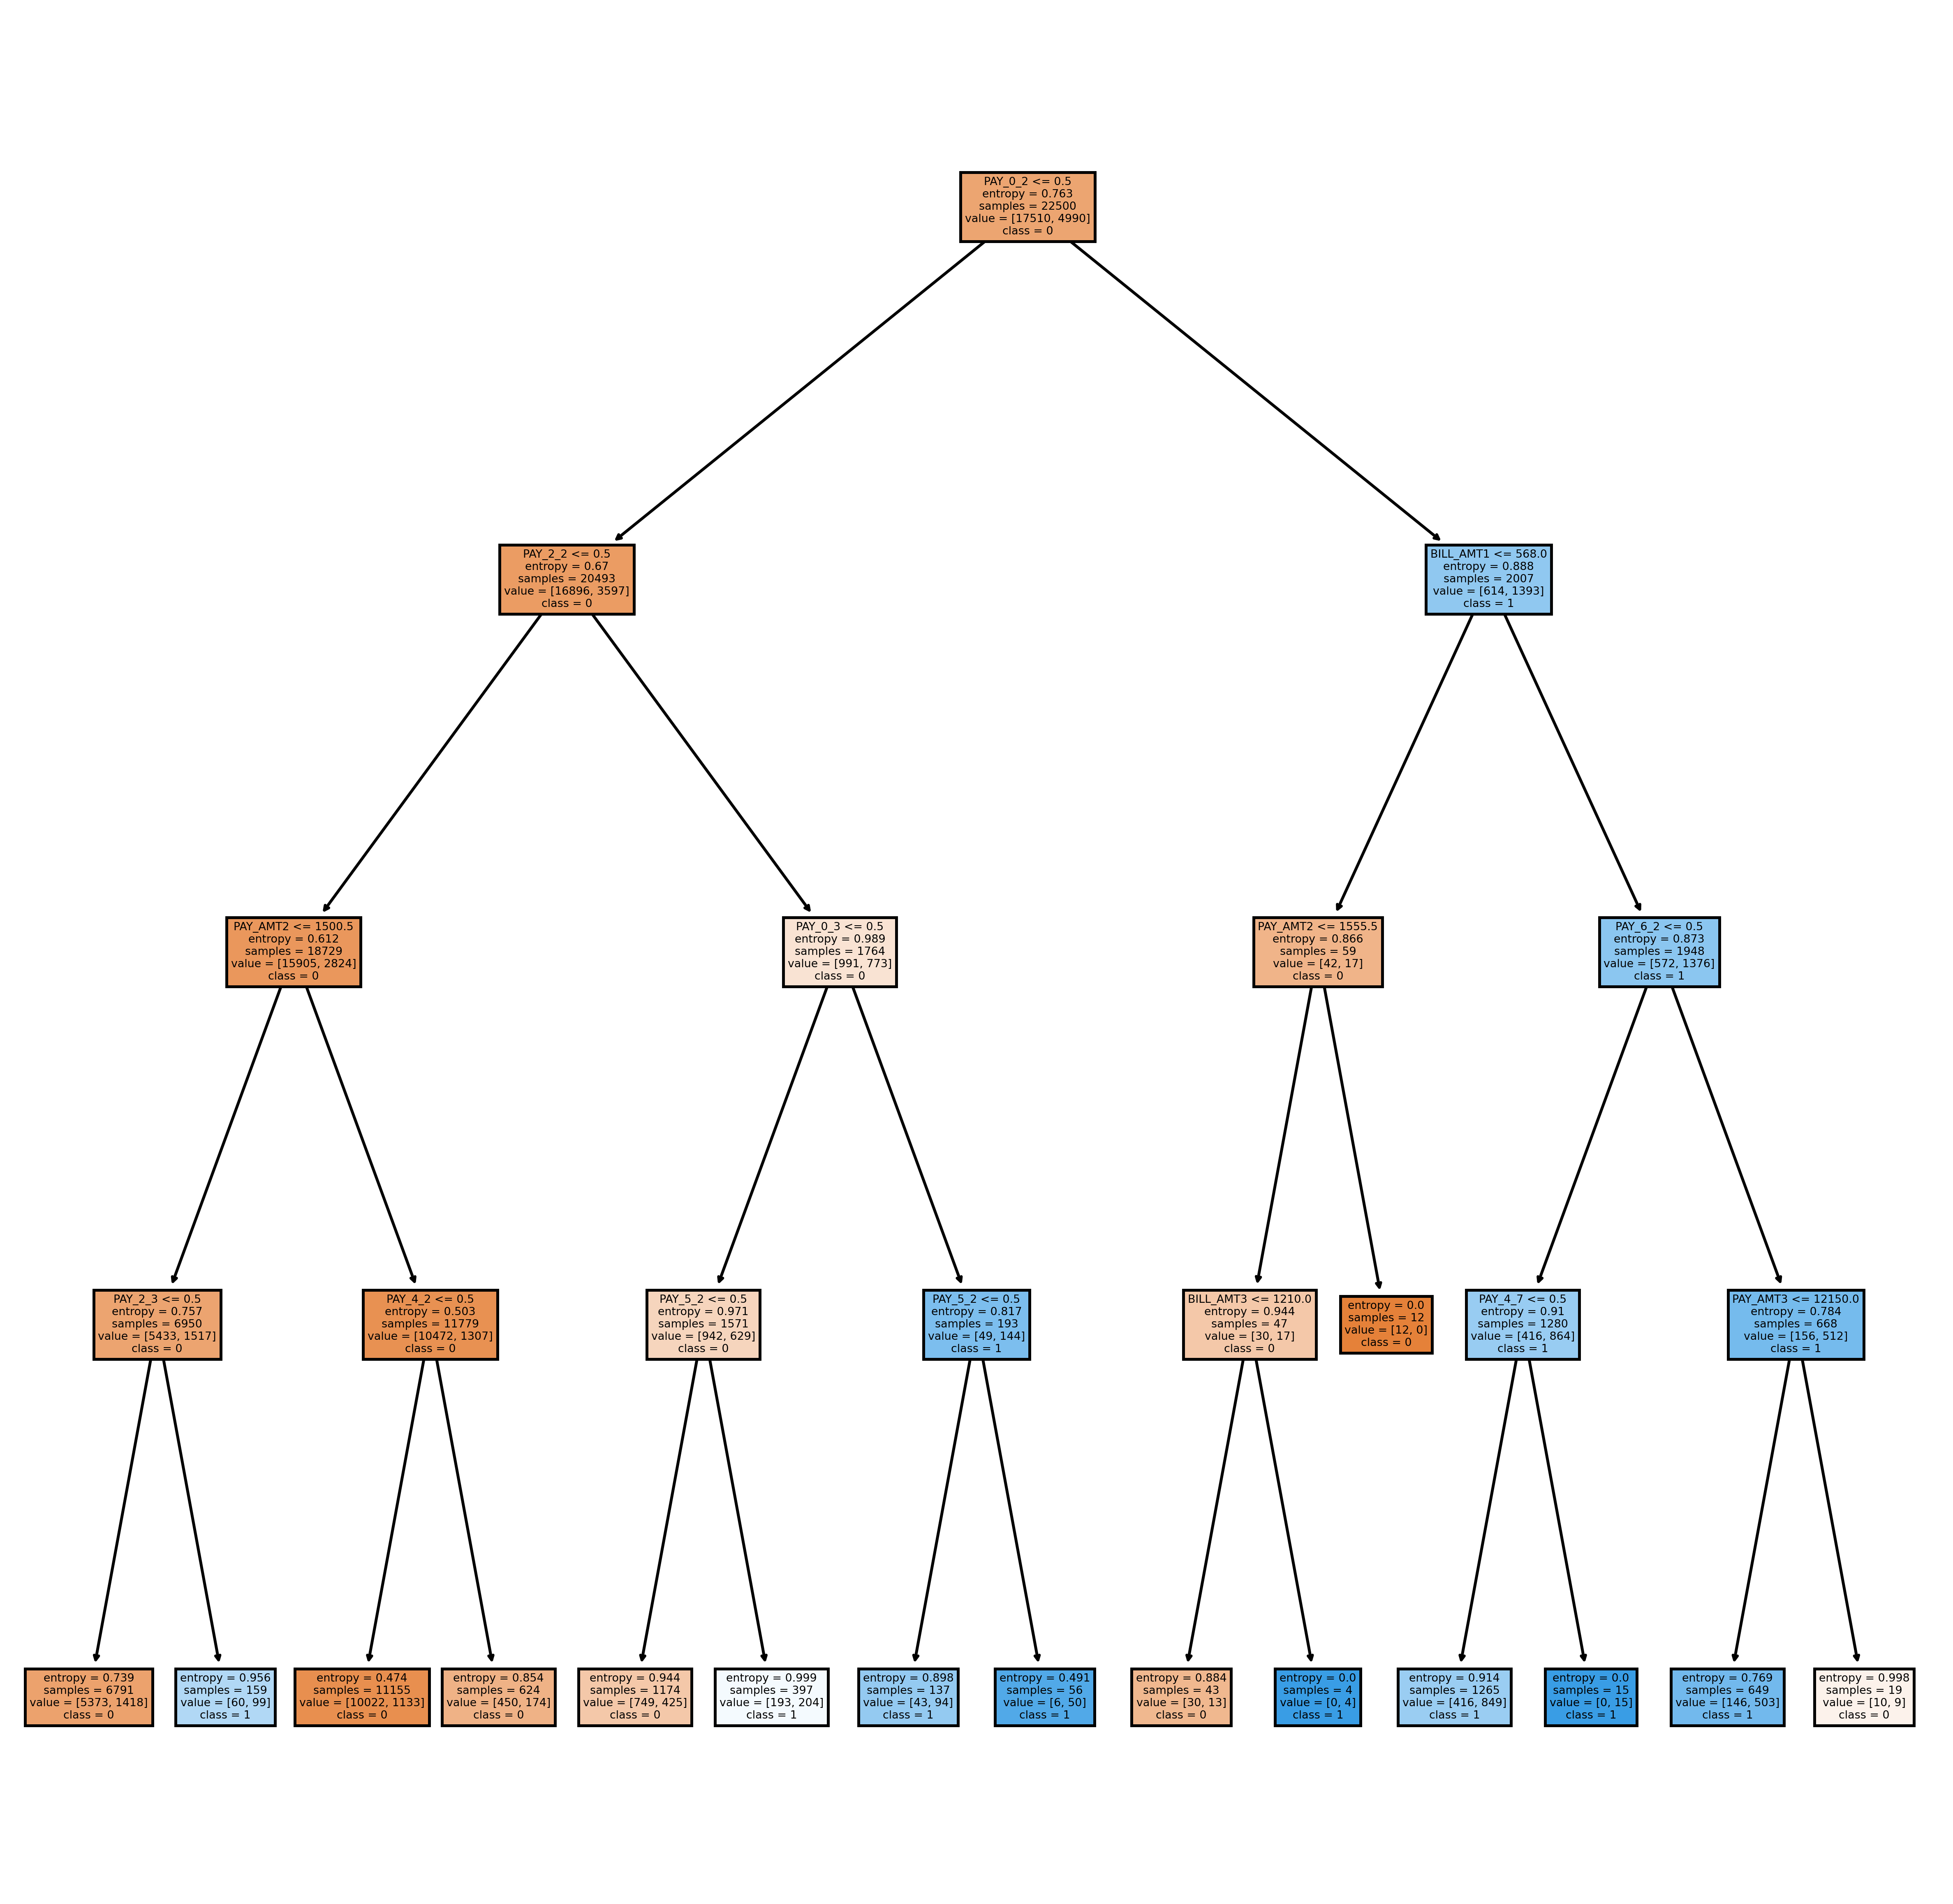

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=500)
tree.plot_tree(dt3,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [74]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.66

Confusion Matrix
----------------


Predicted     0    1   All
True                      
0          5547  307  5854
1          1046  600  1646
All        6593  907  7500

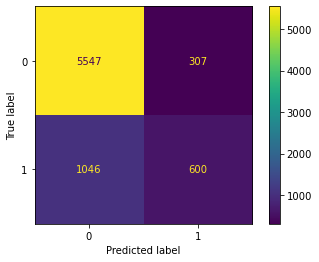

In [75]:
plot_confusion_matrix(dt3, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with Min Samples Split
Optimal min_samples_split = 0.4  
Precision Score: 0.6833333333333333  
Recall Score: 0.27399756986634266  
Accuracy Score: 0.8128  
F1 Score: 0.391153512575889

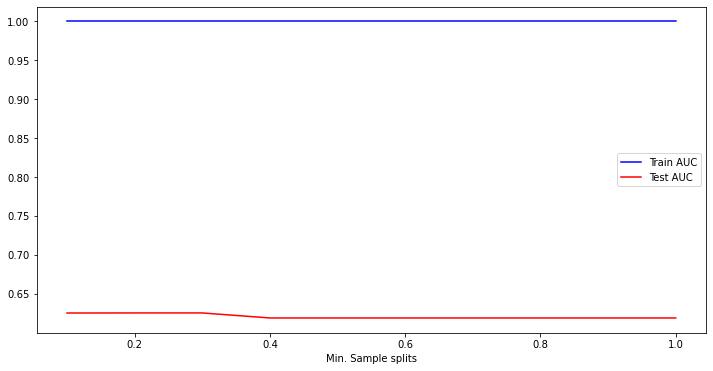

In [77]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=10)
   dt4.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt4.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [78]:
# AUC for both test and train data stabilizes at 0.4
# Further increase in minimum sample split does not improve learning 

In [79]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=0.4, random_state=10) 
dt4.fit(X_train, y_train)
y_preds_decision_tree = dt4.predict(X_test)
print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.6833333333333333
Recall Score: 0.27399756986634266
Accuracy Score: 0.8128
F1 Score: 0.391153512575889


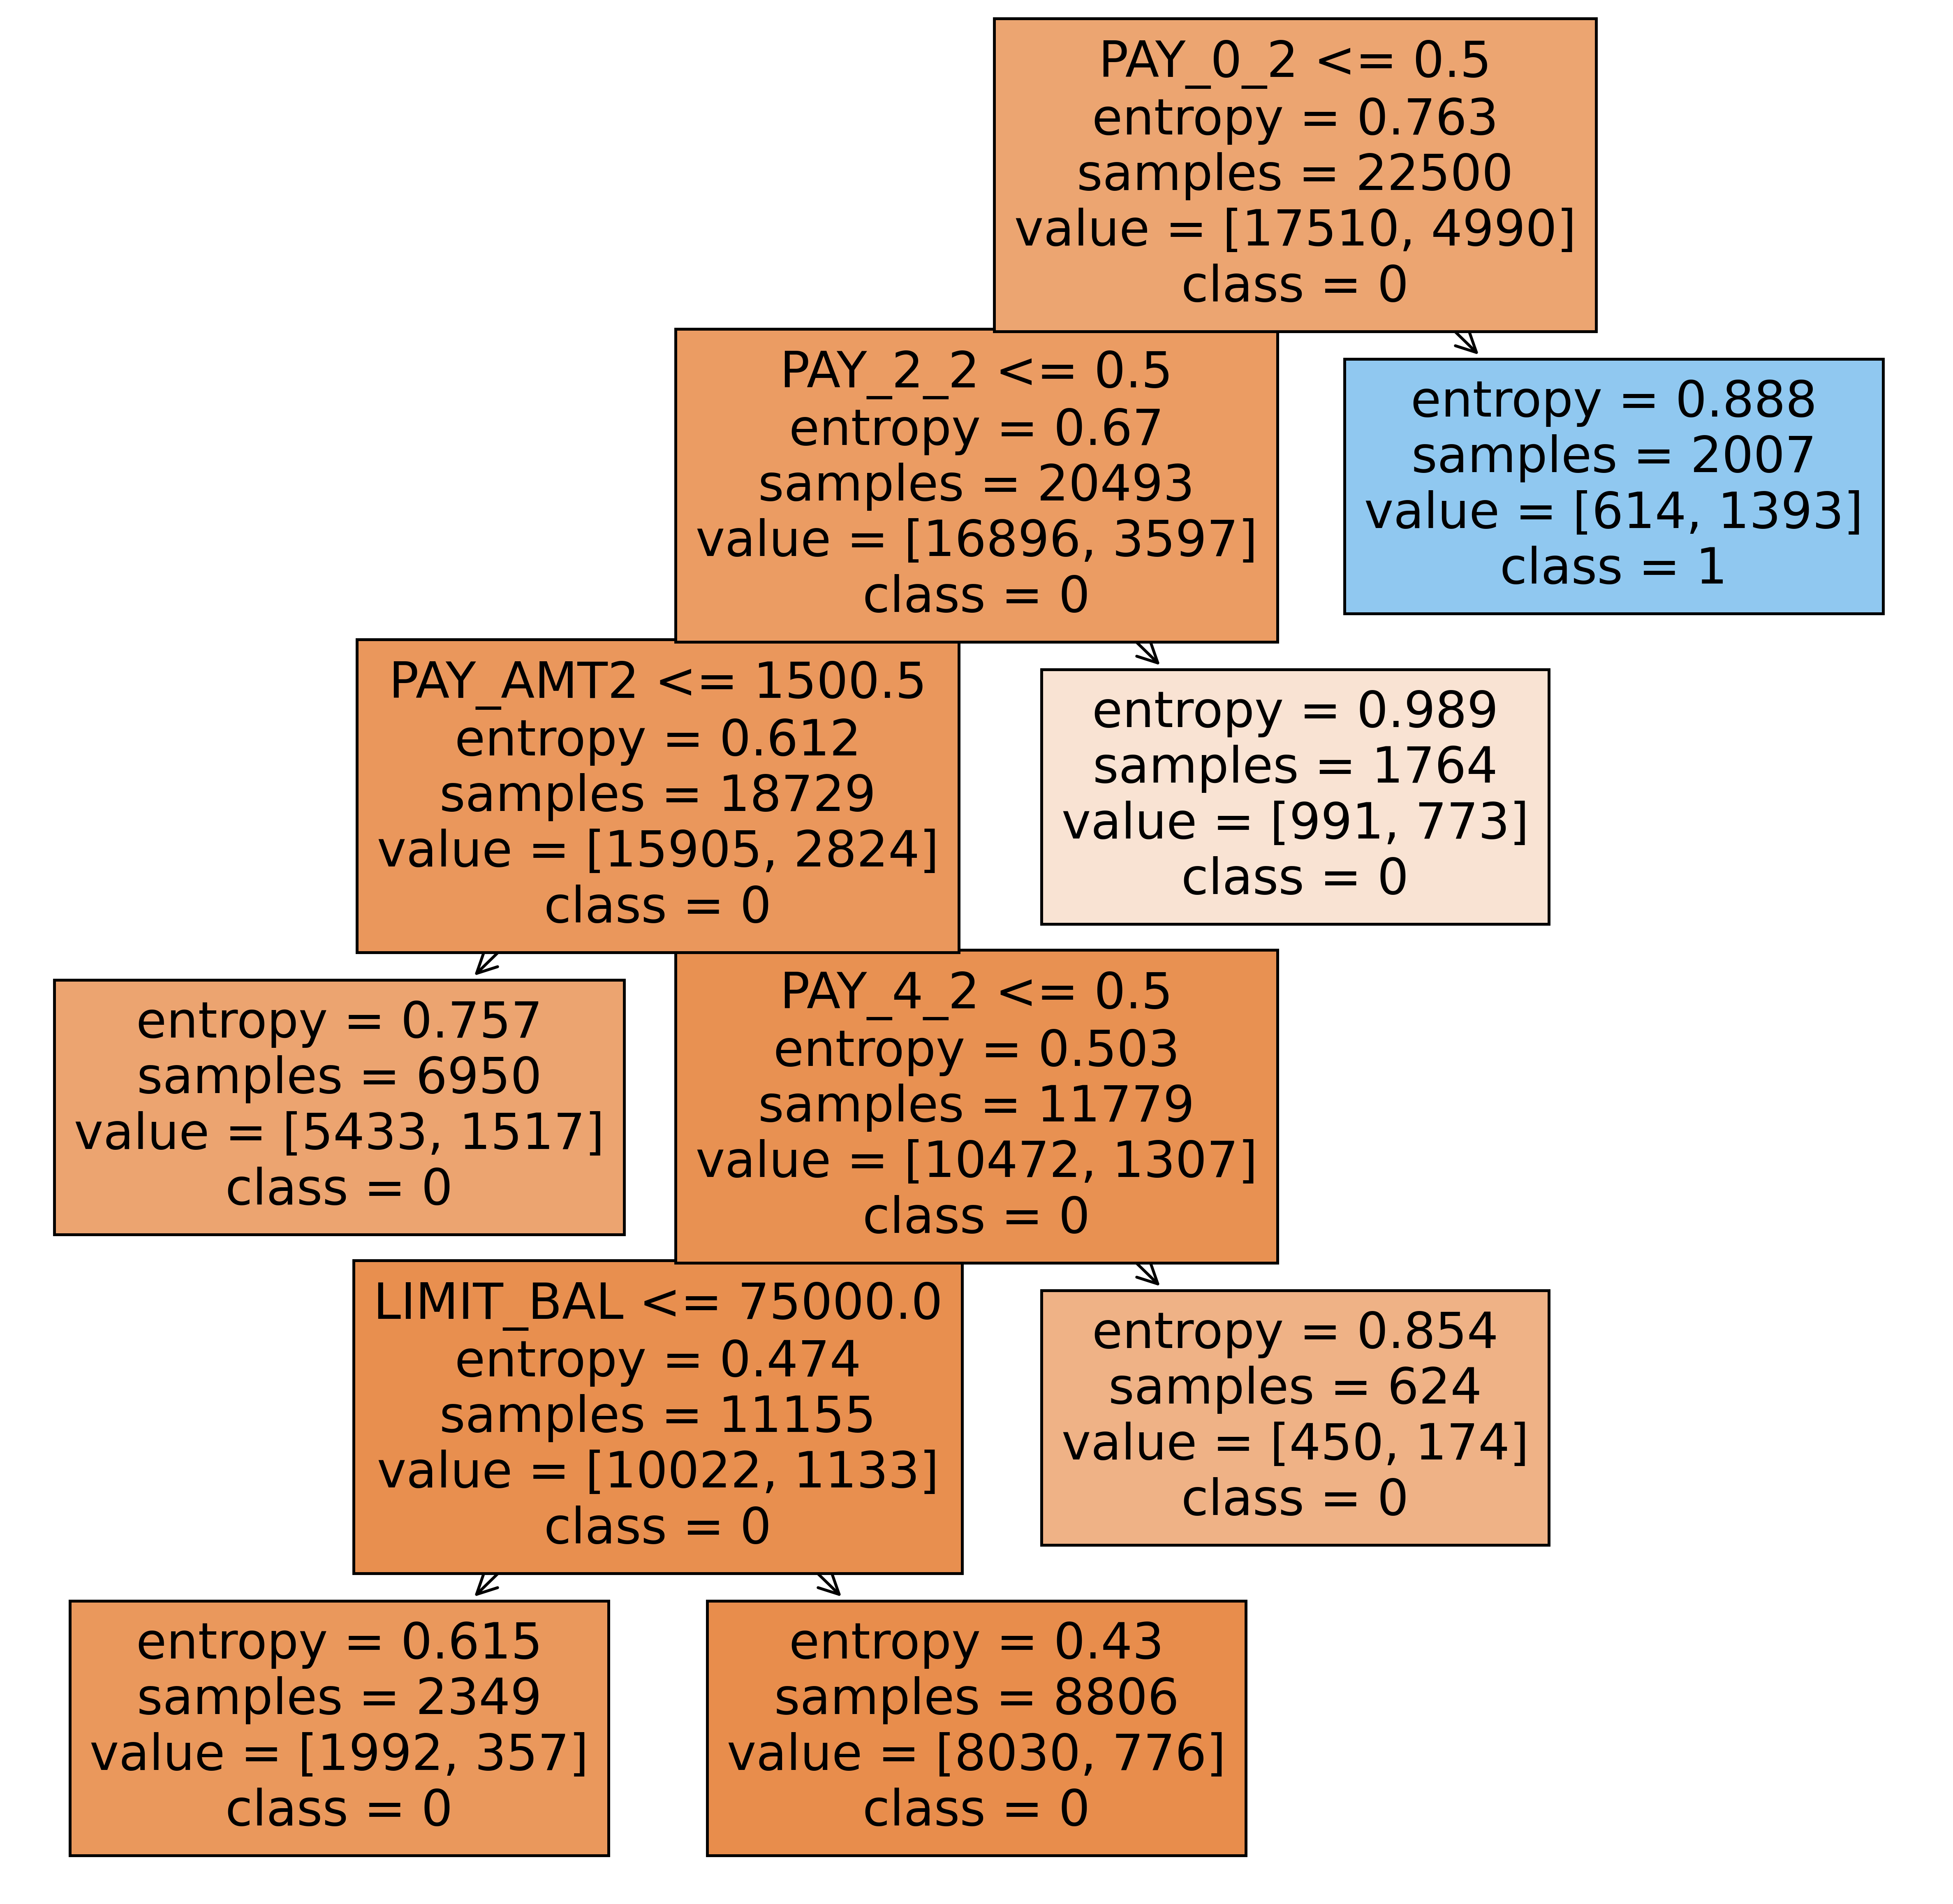

In [80]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=500)
tree.plot_tree(dt4,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [42]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.62

Confusion Matrix
----------------


Predicted     0    1   All
True                      
0          5645  209  5854
1          1195  451  1646
All        6840  660  7500

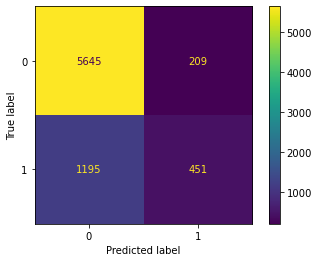

In [81]:
plot_confusion_matrix(dt4, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with Min Samples Leaf
Optimal min_samples_leaf = 0.10  
Precision Score: 0.566839378238342  
Recall Score: 0.33232077764277035  
Accuracy Score: 0.7977333333333333  
F1 Score: 0.41899655304481037  

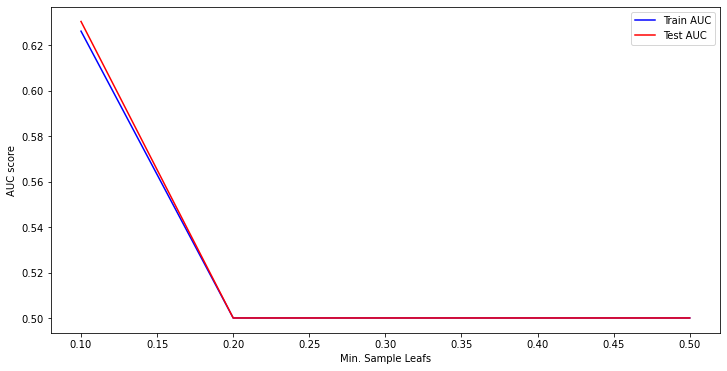

In [82]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt5 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=10)
   dt5.fit(X_train, y_train)
   train_pred = dt5.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt5.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [83]:
# AUC gives best value at 0.1 for both test and training sets 
# Setting a higher minimum per leaf restricts our model too much
# The accuracy drops down if we continue to increase the parameter value 

In [84]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt5 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.10, random_state=10) 
dt5.fit(X_train, y_train)
y_preds_decision_tree = dt5.predict(X_test)
print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.566839378238342
Recall Score: 0.33232077764277035
Accuracy Score: 0.7977333333333333
F1 Score: 0.41899655304481037


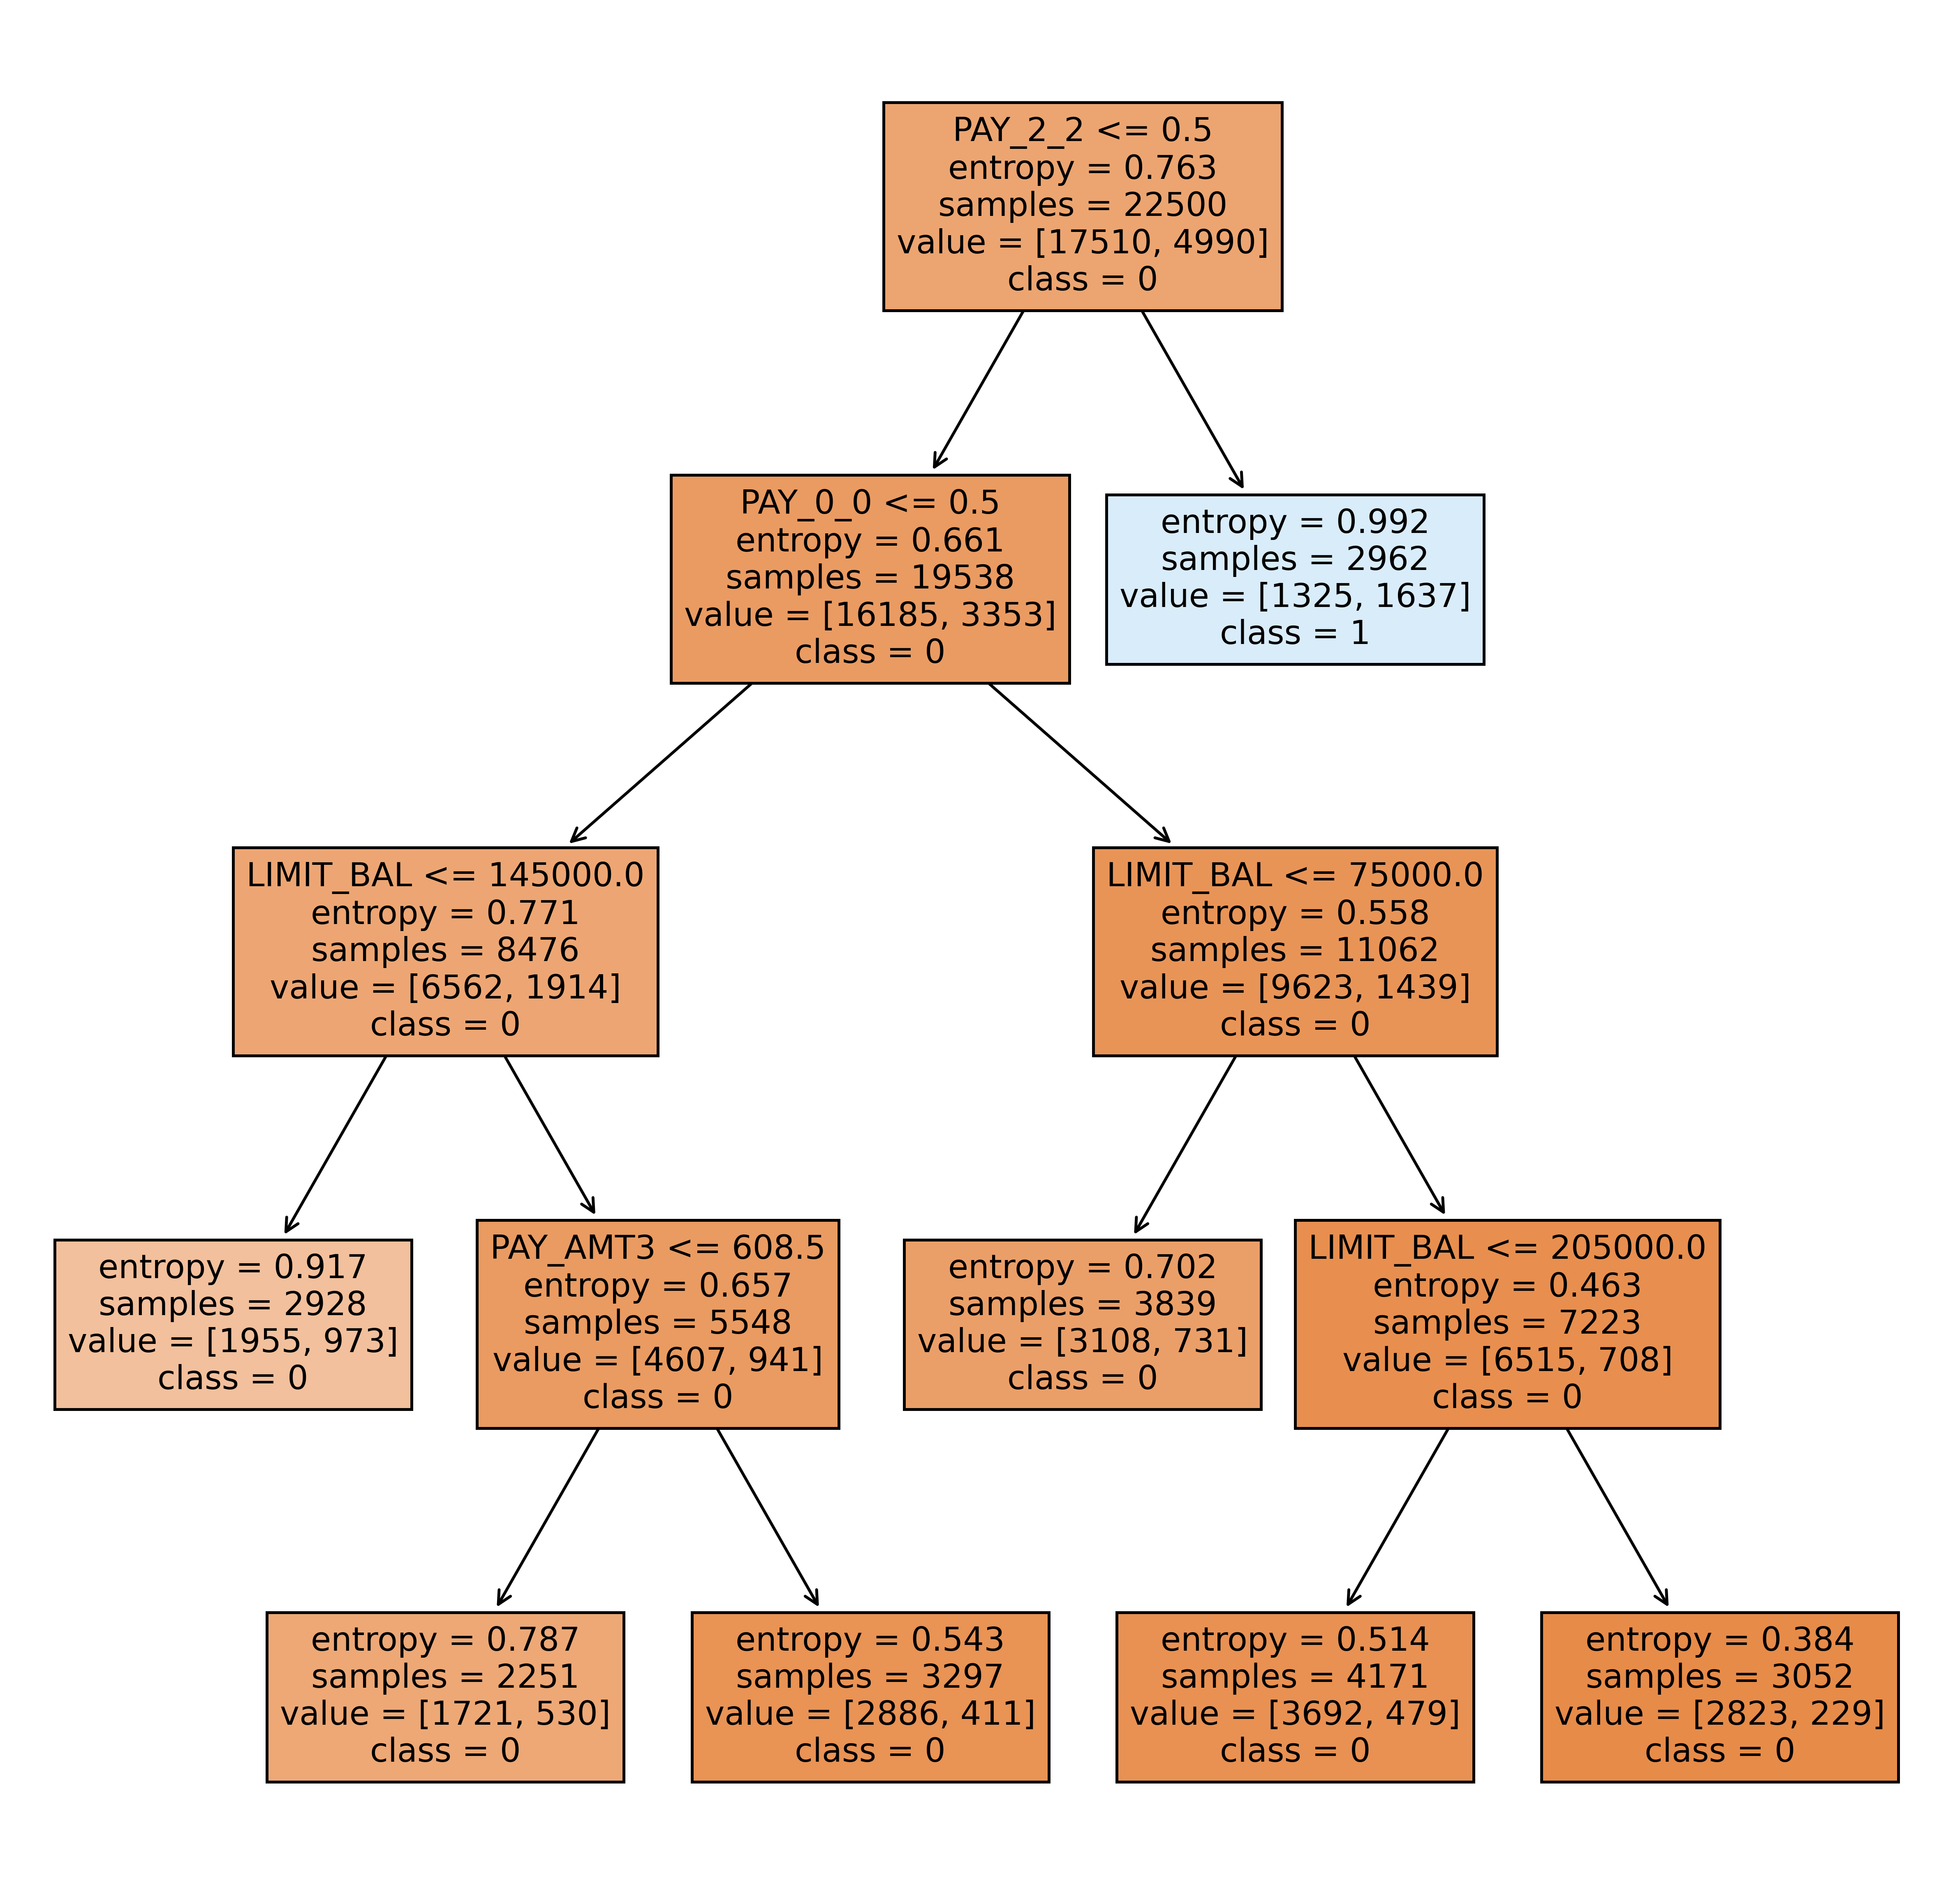

In [85]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=500)
tree.plot_tree(dt5,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [86]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.63

Confusion Matrix
----------------


Predicted     0    1   All
True                      
0          5436  418  5854
1          1099  547  1646
All        6535  965  7500

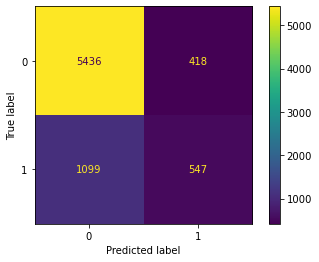

In [87]:
plot_confusion_matrix(dt5, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with Max Features
Optimal max_features = 46  
Precision Score: 0.41352941176470587  
Recall Score: 0.4270959902794654  
Accuracy Score: 0.7413333333333333  
F1 Score: 0.42020322773460844  

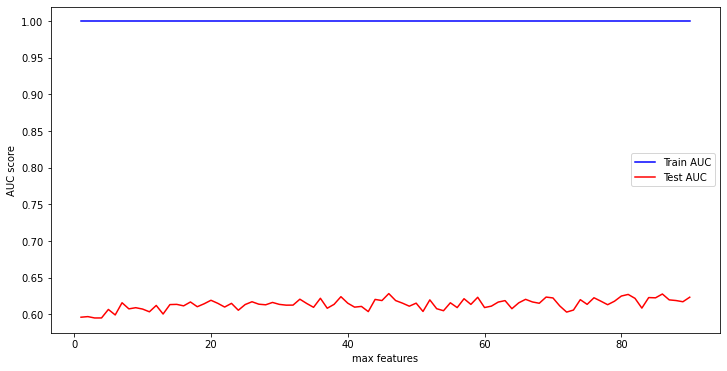

In [88]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt6 = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=10)
   dt6.fit(X_train, y_train)
   train_pred = dt6.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt6.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [89]:
# No clear effect on the training dataset - flat AUC 
# Some fluctuations in test AUC but not definitive enough to make a judgement
# Highest AUC value seen at 45

In [90]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt6 = DecisionTreeClassifier(criterion='entropy', max_features=46, random_state=10) 
dt6.fit(X_train, y_train)
y_preds_decision_tree = dt6.predict(X_test)
print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.41352941176470587
Recall Score: 0.4270959902794654
Accuracy Score: 0.7413333333333333
F1 Score: 0.42020322773460844


In [91]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.63

Confusion Matrix
----------------


Predicted     0     1   All
True                       
0          4857   997  5854
1           943   703  1646
All        5800  1700  7500

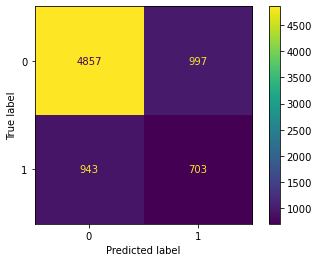

In [92]:
plot_confusion_matrix(dt6, X_test, y_test, values_format='.4g')
plt.show()

### Run Decision Tree with All Optimal Parameters
Optimal Max_depth = 4  
Optimal min_samples_split = 0.4  
Optimal min_samples_leaf = 0.10  
Optimal max_features = 46  

Precision Score: 0.566839378238342  
Recall Score: 0.33232077764277035  
Accuracy Score: 0.7977333333333333  
F1 Score: 0.41899655304481037  

In [93]:
# Create the classifier, fit it on the training data and make predictions on the test set
dt7 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=0.4, 
                              min_samples_leaf=0.10, max_features=46, random_state=10) 
dt7.fit(X_train, y_train)
y_preds_decision_tree = dt7.predict(X_test)
print_metrics(y_test, y_preds_decision_tree)

Precision Score: 0.566839378238342
Recall Score: 0.33232077764277035
Accuracy Score: 0.7977333333333333
F1 Score: 0.41899655304481037


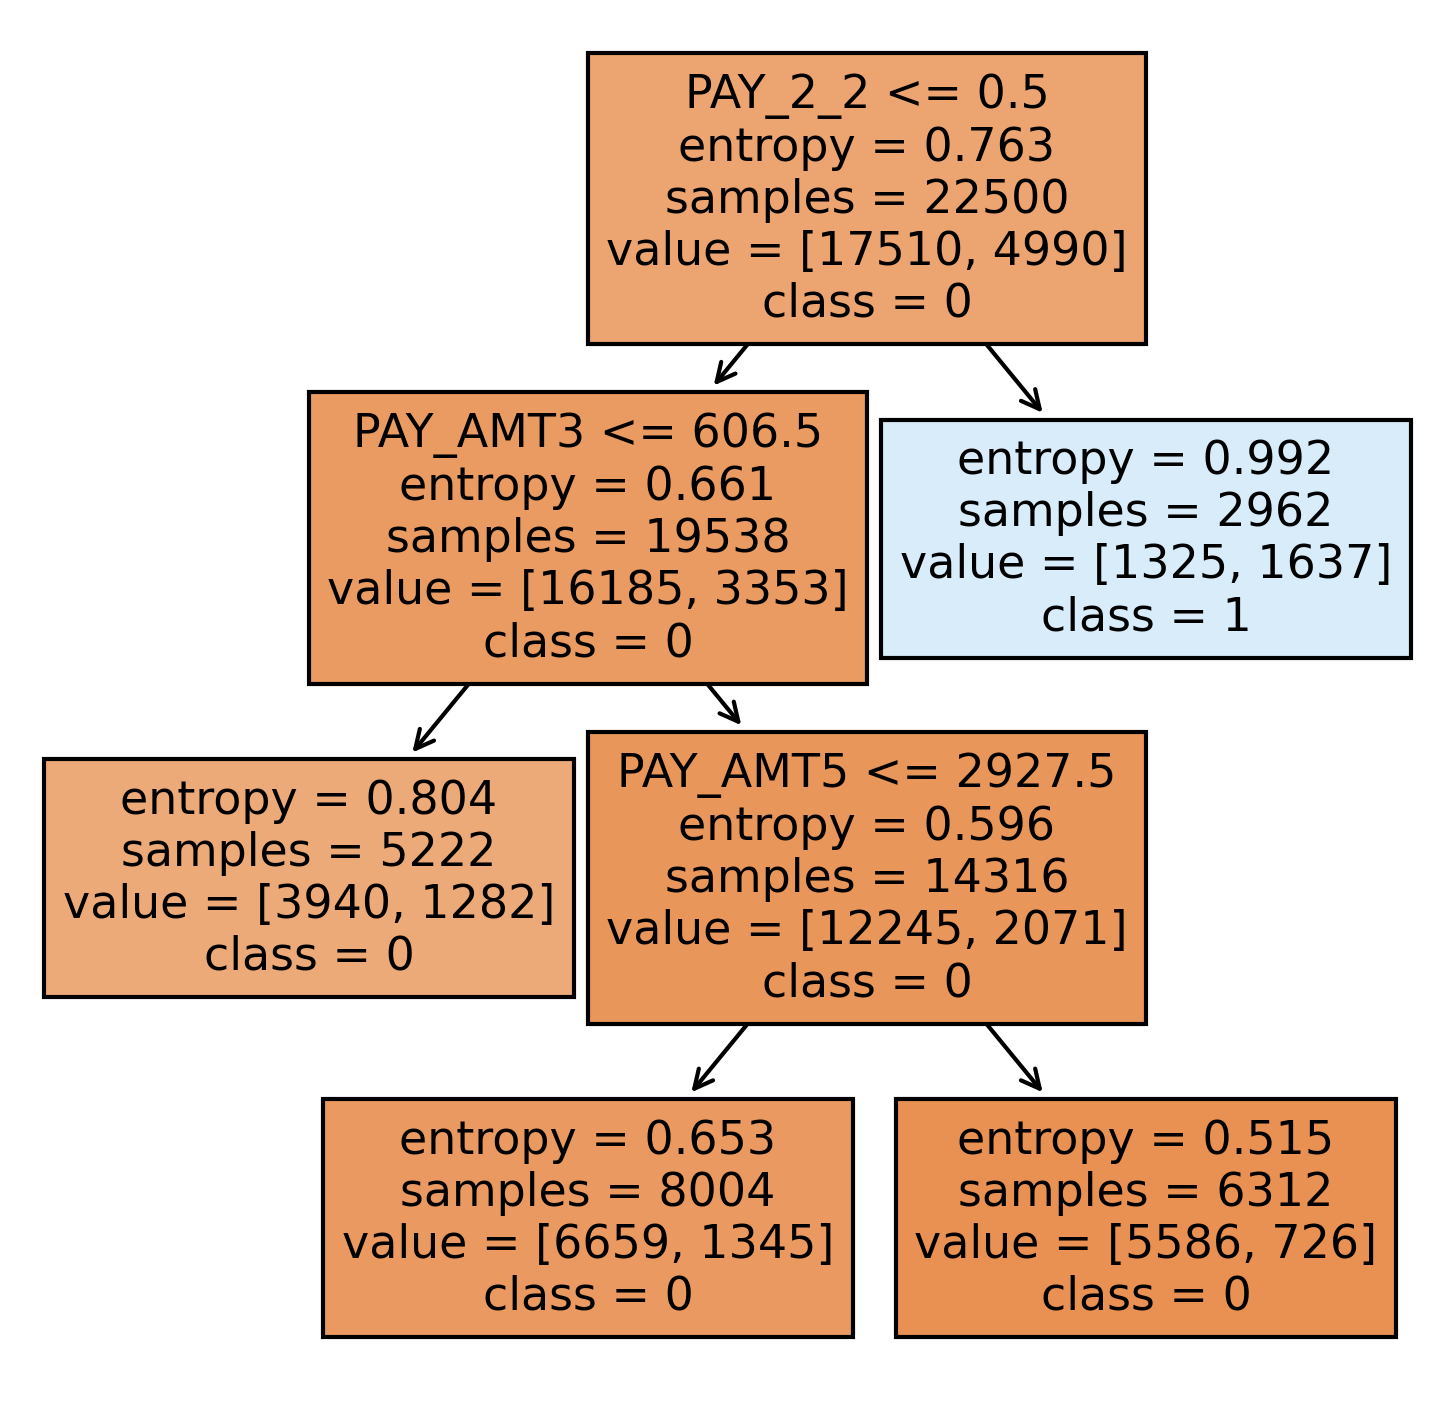

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(dt7,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [95]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_decision_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.63

Confusion Matrix
----------------


Predicted     0    1   All
True                      
0          5436  418  5854
1          1099  547  1646
All        6535  965  7500

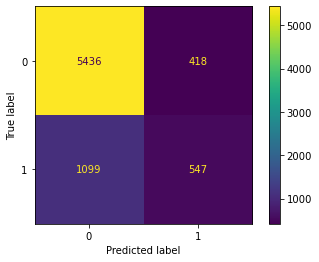

In [96]:
plot_confusion_matrix(dt7, X_test, y_test, values_format='.4g')
plt.show()

In [57]:
# Max Depth appears to have had the best impact on our model

## Logistic Regression

**Output** - logreg1 - logreg2, model_log1 - model_log2, log1_test_preds, log2_test_preds, y_score1 - y_score2

Ran on ohe and scaled data

### Run initial Logistic Regression model

Precision Score: 0.6663090128755365  
Recall Score: 0.3772782503037667  
Accuracy Score: 0.8218666666666666  
F1 Score: 0.48176881303335917

In [47]:
logreg1 = LogisticRegression(fit_intercept=False, C=1e20, solver='lbfgs')
model_log1 = logreg1.fit(scaled_X_train, y_train)
log1_test_preds = logreg1.predict(scaled_X_test)
y_score1 = logreg1.fit(scaled_X_train, y_train).decision_function(scaled_X_test)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

AUC: 0.7643080657273525
----------------------------------------------


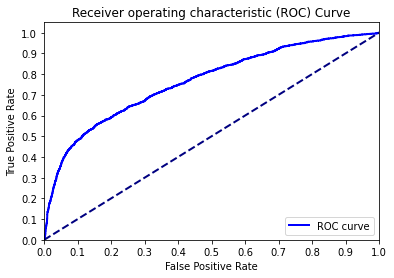

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_score1)
    
print('AUC: {}'.format(auc(fpr, tpr)))
print('----------------------------------------------')
plt.plot(fpr, tpr, color='blue',
             lw=2, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [49]:
print_metrics(y_test, log1_test_preds)

Precision Score: 0.6663090128755365
Recall Score: 0.3772782503037667
Accuracy Score: 0.8218666666666666
F1 Score: 0.48176881303335917


### Run Logistic Regression with balanced classes

Precision Score: 0.48598130841121495  
Recall Score: 0.56865127582017  
Accuracy Score: 0.7733333333333333  
F1 Score: 0.5240761478163493

In [50]:
logreg2 = LogisticRegression(fit_intercept=False, C=1e20, class_weight='balanced', solver='lbfgs')
model_log2 = logreg2.fit(scaled_X_train, y_train)
log2_test_preds = logreg2.predict(scaled_X_test)
y_score2 = logreg2.fit(scaled_X_train, y_train).decision_function(scaled_X_test)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

AUC: 0.7672708029860672
----------------------------------------------


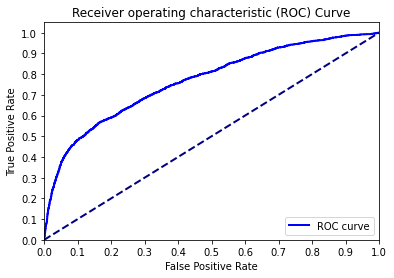

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_score2)
    
print('AUC: {}'.format(auc(fpr, tpr)))
print('----------------------------------------------')
plt.plot(fpr, tpr, color='blue',
             lw=2, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
print_metrics(y_test, log2_test_preds)

Precision Score: 0.48598130841121495
Recall Score: 0.56865127582017
Accuracy Score: 0.7733333333333333
F1 Score: 0.5240761478163493
